
**Setting up a coffee shop and do agriculture in an urban district of Chiang Mai**
kopkrit saikhiao

I tell the truth I can't do it by my self but I look the way to solve this problem from "Anh-Thi DINH"
https://github.com/dinhanhthi/cafe-in-hcm/blob/master/battle_of_neighborhood_project.ipynb
many thanks for your support

A final report for the course "Applied Data Science Capstone" given by IBM on Coursera

Problem's description
(Please read more in the final report!)

By using Data Science and some geometric factors about the relation between districts in Chiang Mai city, we can give good answers of following questions to the investors so that they can have a better vision about not only the café but also about other venues in Chiang Mai City (CNX).

How many venues in each district?
How many categories in each district?
How many venues in each category?
What are the most popular categories in each district?
How many clusters we can use to categorize the districts based on the popularity of coffee shop?
In which districts, Where there are many people but less cafés?
Visualize all information on the map so that we can have a better look on what we want to find the answers!

Moreover, I want to see data about age of people in Mueang district because this is the main and center distirct in Chiang Mai.
so, investor can see the kind of coffee suit for age by data suggest

Further move I interest about the agriculture data about each district.
what district mainly demesticate which type of animal the most?
which district plant rice most and less?
and Visualize all information on the map so that we can have a better look on what we want to find the answers!




Data presentation
1.   Data about Chiang mai from Wikipedia.
2.   Other data from  http://chiangmai.old.nso.go.th/nso/project/search/result_by_department.jsp
but it a raw data. so I have clean it one time to can analysis version and upload to my github.



Methodology
1. First, we need to collect the data by scraping the table of Chiang Mai units on the wikipedia and Chiang Mai nso website. The BeautifulSoup package is very useful in this case.

2. Throughout the project, we use numpy and pandas packages to manipulate dataframes.

3. We use geopy.geocoders.Nominatim to get the coordinates of districts and add them to the main data frame.

4. We use folium package to visualize the Chiang Mai map with its districts. The central coordinate of each district will be represented as a small circle on top of the city map.

5. We use Foursquare API to explore the venues in each district and segment the districts based on them.

6. For clustering the “Coffee shop" venues between districts, we use K-Means Clustering method and the package scikit-learn will help us implement the algorithm on our data. In order to indicate how many K for the method, we try with 10 different values of K from 1 to 10 and use the “elbow" method to choose the most appropriate one.

7. In order to visualize the charts, we use pakage matplotlib.

8. We use again the package folium to visualize the clusters on the main map and the choropleth map

9. Clustering again about agriculture and visualize

**Import all necessary packages**

In [1]:
!pip install folium 

     |████████████████████████████████| 93 kB 1.6 MB/s eta 0:00:011


In [2]:
!pip install Unidecode

     |████████████████████████████████| 239 kB 10.4 MB/s eta 0:00:01


In [3]:
from unidecode import unidecode

In [4]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt


# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import pandas as pd
import numpy as np

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize  

# Scrape the web to get the data
from bs4 import BeautifulSoup
import requests

import folium # map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans

# find the distances
from scipy.spatial.distance import cdist

import psycopg2 as ps

#  to the closest possible representation in ascii text
from unidecode import unidecode

print('Libraries imported.')

Libraries imported.



Collecting data
We don't have an all-in-one talbe, we have to collect all necessary information from various data tables.

First, we scrape the list of all 25 urban districts from a list of administrative units on a wiki page of Chiang Mai City. 

In [5]:
# http://chiangmai.old.nso.go.th/nso/project/search/result_by_department.jsp

url ="https://raw.githubusercontent.com/tutalae/Coursera_Capstone/main/POPCNXALL.csv"

df = pd.read_csv(url)

print(df.head())

                     District  pop 2015  pop 2016  pop 2017  pop 2018  \
0  Mueang Chiang Mai District  235589.0  234837.0  234649.0  234870.0   
1         Chom Thong District   66738.0   66811.0   66792.0   66729.0   
2          Mae Chaem District   59145.0   59515.0   59728.0   60180.0   
3         Chiang Dao District   91457.0   91829.0   92588.0   93128.0   
4          Doi Saket District   71316.0   72064.0   72571.0   73220.0   

   pop 2019  growth- rate 2016  growth- rate 2017  growth- rate 2018  \
0  233632.0              -0.32              -0.08               0.09   
1   66729.0               0.11              -0.03              -0.09   
2   60179.0               0.62               0.36               0.75   
3   96494.0               0.41               0.82               0.58   
4   74172.0               1.04               0.70               0.89   

   growth- rate 2019  Area (Sq.km.)  Population density  \
0              -0.53         152.36             1546.27   
1         

In [6]:
df.columns

Index(['District', 'pop 2015', 'pop 2016', 'pop 2017', 'pop 2018', 'pop 2019',
       'growth- rate 2016', 'growth- rate 2017', 'growth- rate 2018',
       'growth- rate 2019', 'Area (Sq.km.)', 'Population density',
       'rice planted area (rai)', 'loan for agri', 'Unnamed: 14',
       'Unnamed: 15'],
      dtype='object')

In [7]:
df["District"] = df["District"].str.replace(" District","")
df.drop(columns=[ 'Unnamed: 14', 'Unnamed: 15'], inplace= True)
df.drop(25, inplace = True)
df.shape

(25, 14)

In [8]:
df

,District,pop 2015,pop 2016,pop 2017,pop 2018,pop 2019,growth- rate 2016,growth- rate 2017,growth- rate 2018,growth- rate 2019,Area (Sq.km.),Population density,rice planted area (rai),loan for agri
0,Mueang Chiang Mai,235589.0,234837.0,234649.0,234870.0,233632.0,-0.32,-0.08,0.09,-0.53,152.36,1546.27,1686.0,806.83
1,Chom Thong,66738.0,66811.0,66792.0,66729.0,66729.0,0.11,-0.03,-0.09,0.00,712.30,93.69,2045.0,1439.68
2,Mae Chaem,59145.0,59515.0,59728.0,60180.0,60179.0,0.62,0.36,0.75,0.00,2686.57,22.02,243.0,903.56
3,Chiang Dao,91457.0,91829.0,92588.0,93128.0,96494.0,0.41,0.82,0.58,3.55,1882.08,48.59,120.0,585.86
4,Doi Saket,71316.0,72064.0,72571.0,73220.0,74172.0,1.04,0.70,0.89,1.29,671.28,106.24,1928.0,715.45
5,Mae Taeng,75893.0,75699.0,75790.0,76512.0,80303.0,-0.26,0.12,0.95,4.84,1362.78,55.69,7705.0,968.75
6,Mae Rim,90706.0,91558.0,93185.0,94260.0,94337.0,0.93,1.76,1.15,0.08,443.63,204.46,10422.0,686.77
7,Samoeng,23580.0,23642.0,23690.0,23737.0,23780.0,0.26,0.20,0.20,0.18,898.02,26.26,0.0,245.99
8,Fang,117589.0,118075.0,118324.0,119635.0,120759.0,0.41,0.21,1.10,0.94,888.16,132.40,6069.0,1732.49
9,Mae Ai,77533.0,77778.0,78300.0,78423.0,78565.0,0.32,0.67,0.16,0.18,736.70,105.24,23893.0,600.23


In [9]:
df2 = df

In [10]:
# http://chiangmai.old.nso.go.th/nso/project/search/result_by_department.jsp

url2 ="https://raw.githubusercontent.com/tutalae/Coursera_Capstone/main/livestock2015.csv"

dflivestock = pd.read_csv(url2)

dflivestock.drop(0, inplace = True)
dflivestock

print(dflivestock.head())

          District  Beef cattle Dairy cattle  Buffalo    Swine   Chicken  \
1  Mueang district        377.0           -      43.0    122.0   86498.0   
2        Chomthong       7070.0        43.00   2137.0   8038.0  311383.0   
3         Maechaem      33500.0           -    1012.0  12879.0  111137.0   
4        Chiangdao       3159.0           -    3253.0  12819.0  215250.0   
5         Doisaket       3604.0       280.00    285.0   3756.0  462116.0   

      Duck    Goat  Sheep  
1  1356.00   61.00  50.00  
2   508.00   80.00  16.00  
3       -       -      -   
4  3989.00   47.00     -   
5  5614.00  185.00     -   


In [11]:
dflivestock.columns

Index(['District', 'Beef cattle', 'Dairy cattle', 'Buffalo', 'Swine',
       'Chicken', 'Duck', 'Goat', 'Sheep'],
      dtype='object')

In [12]:
dflivestock['Beef cattle'] = dflivestock['Beef cattle'].replace(" - ",0)
dflivestock[ 'Dairy cattle'] = dflivestock[ 'Dairy cattle'].replace(" - ",0)
dflivestock[ 'Buffalo'] = dflivestock[ 'Buffalo'].replace(" - ",0)
dflivestock["Swine"] = dflivestock["Swine"].replace(" - ",0)
dflivestock["Chicken"] = dflivestock["Chicken"].replace(" - ",0)
dflivestock["Duck"] = dflivestock["Duck"].replace(" - ",0)
dflivestock["Goat"] = dflivestock["Goat"].replace(" - ",0)
dflivestock["Sheep"] = dflivestock["Sheep"].replace(" - ",0)

dflivestock['Beef cattle'] = dflivestock['Beef cattle'].astype(float)
dflivestock[ 'Dairy cattle'] = dflivestock[ 'Dairy cattle'].astype(float)
dflivestock[ 'Buffalo'] = dflivestock[ 'Buffalo'].astype(float)
dflivestock["Swine"] = dflivestock["Swine"].astype(float)
dflivestock["Chicken"] = dflivestock["Chicken"].astype(float)
dflivestock["Duck"] = dflivestock["Duck"].astype(float)
dflivestock["Goat"] = dflivestock["Goat"].astype(float)
dflivestock["Sheep"] = dflivestock["Sheep"].astype(float)

In [13]:
dflivestock["Sum2legAnimal"] = dflivestock["Swine"] + dflivestock["Chicken"] + dflivestock["Duck"] + dflivestock["Goat"] 
dflivestock["Sum4legAnimal"] = dflivestock["Beef cattle"]+ dflivestock["Dairy cattle"] + dflivestock["Buffalo"] + dflivestock["Goat"] + dflivestock["Sheep"]

In [14]:
#dflivestock["SumAnimal"] = dflivestock["Beef cattle"]+ dflivestock["Dairy cattle"] + dflivestock["Buffalo"] + dflivestock["Swine"] + dflivestock["Chicken"] + dflivestock["Duck"] + dflivestock["Goat"] + dflivestock["Sheep"]

# most domesticat animal for each district

In [81]:
livestockmax = dflivestock.max()
livestockmax

District          Wianghaeng
Beef cattle            33500
Dairy cattle           11831
Buffalo                 7327
Swine                  97409
Chicken          1.55052e+06
Duck                   10082
Goat                     215
Sheep                     50
Sum2legAnimal    1.55507e+06
Sum4legAnimal          36017
dtype: object

In [16]:
dflivestock[dflivestock["Beef cattle"] == dflivestock["Beef cattle"].max()]

,District,Beef cattle,Dairy cattle,Buffalo,Swine,Chicken,Duck,Goat,Sheep,Sum2legAnimal,Sum4legAnimal
3,Maechaem,33500.0,0.0,1012.0,12879.0,111137.0,0.0,0.0,0.0,124016.0,34512.0


In [91]:
dflivestock[dflivestock["Dairy cattle"] == dflivestock["Dairy cattle"].max()]

,District,Beef cattle,Dairy cattle,Buffalo,Swine,Chicken,Duck,Goat,Sheep,Sum2legAnimal,Sum4legAnimal
23,Maeon,3914.0,11831.0,654.0,4069.0,72569.0,536.0,24.0,20.0,77198.0,16443.0


In [92]:
dflivestock[dflivestock["Buffalo"] == dflivestock["Buffalo"].max()]

,District,Beef cattle,Dairy cattle,Buffalo,Swine,Chicken,Duck,Goat,Sheep,Sum2legAnimal,Sum4legAnimal
18,Omkoi,28684.0,0.0,7327.0,17943.0,101275.0,735.0,6.0,0.0,119959.0,36017.0


In [93]:
dflivestock[dflivestock["Swine"] == dflivestock["Swine"].max()]

,District,Beef cattle,Dairy cattle,Buffalo,Swine,Chicken,Duck,Goat,Sheep,Sum2legAnimal,Sum4legAnimal
10,Maeai,11843.0,0.0,4366.0,97409.0,577141.0,1541.0,0.0,0.0,676091.0,16209.0


In [94]:
dflivestock[dflivestock["Chicken"] == dflivestock["Chicken"].max()]

,District,Beef cattle,Dairy cattle,Buffalo,Swine,Chicken,Duck,Goat,Sheep,Sum2legAnimal,Sum4legAnimal
14,Sanaai,2586.0,3026.0,318.0,782.0,1550525.0,3642.0,120.0,9.0,1555069.0,6059.0


In [95]:
dflivestock[dflivestock["Duck"] == dflivestock["Duck"].max()]

,District,Beef cattle,Dairy cattle,Buffalo,Swine,Chicken,Duck,Goat,Sheep,Sum2legAnimal,Sum4legAnimal
19,Saraphi,551.0,218.0,68.0,3876.0,145239.0,10082.0,122.0,8.0,159319.0,967.0


In [96]:
dflivestock[dflivestock["Goat"] == dflivestock["Goat"].max()]

,District,Beef cattle,Dairy cattle,Buffalo,Swine,Chicken,Duck,Goat,Sheep,Sum2legAnimal,Sum4legAnimal
24,Doilaw,1754.0,1571.0,18.0,48712.0,100993.0,5232.0,215.0,0.0,155152.0,3558.0


In [98]:
dflivestock[dflivestock["Sheep"] == dflivestock["Sheep"].max()]

,District,Beef cattle,Dairy cattle,Buffalo,Swine,Chicken,Duck,Goat,Sheep,Sum2legAnimal,Sum4legAnimal
1,Mueang district,377.0,0.0,43.0,122.0,86498.0,1356.0,61.0,50.0,88037.0,531.0


In [17]:
dflivestock

,District,Beef cattle,Dairy cattle,Buffalo,Swine,Chicken,Duck,Goat,Sheep,Sum2legAnimal,Sum4legAnimal
1,Mueang district,377.0,0.0,43.0,122.0,86498.0,1356.0,61.0,50.0,88037.0,531.0
2,Chomthong,7070.0,43.0,2137.0,8038.0,311383.0,508.0,80.0,16.0,320009.0,9346.0
3,Maechaem,33500.0,0.0,1012.0,12879.0,111137.0,0.0,0.0,0.0,124016.0,34512.0
4,Chiangdao,3159.0,0.0,3253.0,12819.0,215250.0,3989.0,47.0,0.0,232105.0,6459.0
5,Doisaket,3604.0,280.0,285.0,3756.0,462116.0,5614.0,185.0,0.0,471671.0,4354.0
6,Maetaeng,4085.0,154.0,1658.0,69713.0,262213.0,3575.0,31.0,35.0,335532.0,5963.0
7,Maerim,1838.0,496.0,325.0,87803.0,131192.0,1215.0,96.0,20.0,220306.0,2775.0
8,Samoeng,4929.0,0.0,931.0,3123.0,36241.0,188.0,0.0,0.0,39552.0,5860.0
9,Fang,530.0,541.0,671.0,9557.0,131171.0,9353.0,0.0,0.0,150081.0,1742.0
10,Maeai,11843.0,0.0,4366.0,97409.0,577141.0,1541.0,0.0,0.0,676091.0,16209.0


In [99]:
dflivestock[dflivestock["Sum2legAnimal"] == dflivestock["Sum2legAnimal"].max()]

,District,Beef cattle,Dairy cattle,Buffalo,Swine,Chicken,Duck,Goat,Sheep,Sum2legAnimal,Sum4legAnimal
14,Sanaai,2586.0,3026.0,318.0,782.0,1550525.0,3642.0,120.0,9.0,1555069.0,6059.0


In [100]:
dflivestock[dflivestock["Sum4legAnimal"] == dflivestock["Sum4legAnimal"].max()]

,District,Beef cattle,Dairy cattle,Buffalo,Swine,Chicken,Duck,Goat,Sheep,Sum2legAnimal,Sum4legAnimal
18,Omkoi,28684.0,0.0,7327.0,17943.0,101275.0,735.0,6.0,0.0,119959.0,36017.0


# Get the coordinates of the districts
Next, we find all coordinates of all districts in Chiang Mai their name. In order to do that, we create a function which does the same job for all.

In [18]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")
district = "Mueang Chiang Mai"
city ="Chiang Mai"
country ="TH"
loc = geolocator.geocode(city+','+ country)
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

latitude is :- 18.7882778 
longtitude is:- 98.9868056


In [19]:
def find_coor(name):
    city = name
    address = name + " Chiang Mai Thailand"
    geolocator = Nominatim(user_agent="my_user_agent")
    country ="TH"
    loc = geolocator.geocode(city+','+ country)
    latitude = loc.latitude
    longitude = loc.longitude
    return [latitude, longitude]

In [20]:
df2["TotalAnimal2leg"] = dflivestock["Sum2legAnimal"]
df2["TotalAnimal4leg"] = dflivestock["Sum4legAnimal"]
df2

,District,pop 2015,pop 2016,pop 2017,pop 2018,pop 2019,growth- rate 2016,growth- rate 2017,growth- rate 2018,growth- rate 2019,Area (Sq.km.),Population density,rice planted area (rai),loan for agri,TotalAnimal2leg,TotalAnimal4leg
0,Mueang Chiang Mai,235589.0,234837.0,234649.0,234870.0,233632.0,-0.32,-0.08,0.09,-0.53,152.36,1546.27,1686.0,806.83,NaN,NaN
1,Chom Thong,66738.0,66811.0,66792.0,66729.0,66729.0,0.11,-0.03,-0.09,0.00,712.30,93.69,2045.0,1439.68,88037.0,531.0
2,Mae Chaem,59145.0,59515.0,59728.0,60180.0,60179.0,0.62,0.36,0.75,0.00,2686.57,22.02,243.0,903.56,320009.0,9346.0
3,Chiang Dao,91457.0,91829.0,92588.0,93128.0,96494.0,0.41,0.82,0.58,3.55,1882.08,48.59,120.0,585.86,124016.0,34512.0
4,Doi Saket,71316.0,72064.0,72571.0,73220.0,74172.0,1.04,0.70,0.89,1.29,671.28,106.24,1928.0,715.45,232105.0,6459.0
5,Mae Taeng,75893.0,75699.0,75790.0,76512.0,80303.0,-0.26,0.12,0.95,4.84,1362.78,55.69,7705.0,968.75,471671.0,4354.0
6,Mae Rim,90706.0,91558.0,93185.0,94260.0,94337.0,0.93,1.76,1.15,0.08,443.63,204.46,10422.0,686.77,335532.0,5963.0
7,Samoeng,23580.0,23642.0,23690.0,23737.0,23780.0,0.26,0.20,0.20,0.18,898.02,26.26,0.0,245.99,220306.0,2775.0
8,Fang,117589.0,118075.0,118324.0,119635.0,120759.0,0.41,0.21,1.10,0.94,888.16,132.40,6069.0,1732.49,39552.0,5860.0
9,Mae Ai,77533.0,77778.0,78300.0,78423.0,78565.0,0.32,0.67,0.16,0.18,736.70,105.24,23893.0,600.23,150081.0,1742.0


In [21]:
# For District 1 to 12 (numbers)
coords = [find_coor(dist) for dist in df2["District"].iloc[0:].tolist()]
df_coords = pd.DataFrame(coords, columns=["Latitude", "Longitude"])

df2["Latitude"] = df_coords["Latitude"]
df2["Longitude"] = df_coords["Longitude"]

df3 = df2
df3

,District,pop 2015,pop 2016,pop 2017,pop 2018,pop 2019,growth- rate 2016,growth- rate 2017,growth- rate 2018,growth- rate 2019,Area (Sq.km.),Population density,rice planted area (rai),loan for agri,TotalAnimal2leg,TotalAnimal4leg,Latitude,Longitude
0,Mueang Chiang Mai,235589.0,234837.0,234649.0,234870.0,233632.0,-0.32,-0.08,0.09,-0.53,152.36,1546.27,1686.0,806.83,NaN,NaN,18.788957,98.987312
1,Chom Thong,66738.0,66811.0,66792.0,66729.0,66729.0,0.11,-0.03,-0.09,0.00,712.30,93.69,2045.0,1439.68,88037.0,531.0,18.422113,98.677280
2,Mae Chaem,59145.0,59515.0,59728.0,60180.0,60179.0,0.62,0.36,0.75,0.00,2686.57,22.02,243.0,903.56,320009.0,9346.0,18.499240,98.362740
3,Chiang Dao,91457.0,91829.0,92588.0,93128.0,96494.0,0.41,0.82,0.58,3.55,1882.08,48.59,120.0,585.86,124016.0,34512.0,19.368442,98.964982
4,Doi Saket,71316.0,72064.0,72571.0,73220.0,74172.0,1.04,0.70,0.89,1.29,671.28,106.24,1928.0,715.45,232105.0,6459.0,18.873195,99.136566
5,Mae Taeng,75893.0,75699.0,75790.0,76512.0,80303.0,-0.26,0.12,0.95,4.84,1362.78,55.69,7705.0,968.75,471671.0,4354.0,19.121308,98.943384
6,Mae Rim,90706.0,91558.0,93185.0,94260.0,94337.0,0.93,1.76,1.15,0.08,443.63,204.46,10422.0,686.77,335532.0,5963.0,18.914458,98.945274
7,Samoeng,23580.0,23642.0,23690.0,23737.0,23780.0,0.26,0.20,0.20,0.18,898.02,26.26,0.0,245.99,220306.0,2775.0,18.847780,98.732032
8,Fang,117589.0,118075.0,118324.0,119635.0,120759.0,0.41,0.21,1.10,0.94,888.16,132.40,6069.0,1732.49,39552.0,5860.0,19.920420,99.215546
9,Mae Ai,77533.0,77778.0,78300.0,78423.0,78565.0,0.32,0.67,0.16,0.18,736.70,105.24,23893.0,600.23,150081.0,1742.0,20.032867,99.298000


In [22]:
df3.drop([ 'pop 2015', 'pop 2016', 'pop 2017',	'pop 2018','growth- rate 2016', 'growth- rate 2017', 'growth- rate 2018', 'growth- rate 2019'], axis=1, inplace= True)

Population on age range in 2019

In [23]:
df3

,District,pop 2019,Area (Sq.km.),Population density,rice planted area (rai),loan for agri,TotalAnimal2leg,TotalAnimal4leg,Latitude,Longitude
0,Mueang Chiang Mai,233632.0,152.36,1546.27,1686.0,806.83,NaN,NaN,18.788957,98.987312
1,Chom Thong,66729.0,712.30,93.69,2045.0,1439.68,88037.0,531.0,18.422113,98.677280
2,Mae Chaem,60179.0,2686.57,22.02,243.0,903.56,320009.0,9346.0,18.499240,98.362740
3,Chiang Dao,96494.0,1882.08,48.59,120.0,585.86,124016.0,34512.0,19.368442,98.964982
4,Doi Saket,74172.0,671.28,106.24,1928.0,715.45,232105.0,6459.0,18.873195,99.136566
5,Mae Taeng,80303.0,1362.78,55.69,7705.0,968.75,471671.0,4354.0,19.121308,98.943384
6,Mae Rim,94337.0,443.63,204.46,10422.0,686.77,335532.0,5963.0,18.914458,98.945274
7,Samoeng,23780.0,898.02,26.26,0.0,245.99,220306.0,2775.0,18.847780,98.732032
8,Fang,120759.0,888.16,132.40,6069.0,1732.49,39552.0,5860.0,19.920420,99.215546
9,Mae Ai,78565.0,736.70,105.24,23893.0,600.23,150081.0,1742.0,20.032867,99.298000


In [24]:
# Fix lat long Mae On
df3.iloc[22,8]= 18.798510
df3.iloc[22,9]= 99.245030
df3.fillna(0, inplace = True)

In [25]:
dfmain = df3

# Visualize age range of people in Muang Chiang Mai

In [26]:
# http://chiangmai.old.nso.go.th/nso/project/search_option/search_result.jsp

url2 ="https://raw.githubusercontent.com/tutalae/Coursera_Capstone/main/POPAGE.csv"

df4 = pd.read_csv(url2)

print(df4.head())

                     District Population registered in central house file  \
0                       Total                                      23,190   
1              Municipal area                                      12,422   
2          Non-municipal area                                      10,768   
3  Mueang Chiang Mai District                                       5,787   
4         Chom Thong District                                         666   

  Transferring population A Non-Thai national  Unknown   A 0-4  A  5-9  \
0                   3,067             135,160      1.0  76,090  85,216   
1                   1,725              31,844      1.0  25,888  29,419   
2                   1,342             103,316      NaN  50,202  55,797   
3                     869               4,860      NaN   7,958   9,438   
4                     115                 149      NaN   3,255   3,488   

  A 10-14 A 15-19  A 20-24  A 25-29  A 30-34  A 35-39  A 40-44  A 45-49  \
0  87,640  93,107

In [27]:
df4.columns

Index(['District', 'Population registered in central house file',
       'Transferring population', 'A Non-Thai national', 'Unknown', 'A 0-4',
       'A  5-9', 'A 10-14', 'A 15-19', 'A 20-24', 'A 25-29', 'A 30-34',
       'A 35-39', 'A 40-44', 'A 45-49', 'A 50-54', 'A 55-59', 'A 60-64',
       'A 65-69', 'A 70-74', 'A 75-79', 'A 80 and over', 'Total'],
      dtype='object')

In [28]:
df4.drop(['Unknown'], axis=1, inplace = True)

In [29]:
df4.columns = ['District', 'Population registered in central house file',
       'Transferring population', 'A Non-Thai national', '0-4',
       '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
       '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
       '65-69', '70-74', '75-79', '80 and over', 'Total']

df4["District"] = df4["District"].str.replace(" District","")

df4 = df4.set_index("District")
df4.head()


,Population registered in central house file,Transferring population,A Non-Thai national,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 and over,Total
District,,,,,,,,,,,,,,,,,,,,,
Total,"23,190","3,067","135,160","76,090","85,216","87,640","93,107","109,613","119,755","115,836","124,209","115,171","107,921","118,366","131,220","121,167","86,141","50,393","29,312","46,679","1,779,254"
Municipal area,"12,422","1,725","31,844","25,888","29,419","30,233","32,410","43,240","45,603","45,069","49,510","46,546","42,758","46,243","52,384","49,493","36,633","21,201","12,592","20,226","675,440"
Non-municipal area,"10,768","1,342","103,316","50,202","55,797","57,407","60,697","66,373","74,152","70,767","74,699","68,625","65,163","72,123","78,836","71,674","49,508","29,192","16,720","26,453","1,103,814"
Mueang Chiang Mai,"5,787",869,"4,860","7,958","9,438","9,830","11,616","16,855","15,918","15,624","17,624","16,894","15,542","16,102","17,655","16,648","13,197","8,005","4,887","8,323","233,632"
Chom Thong,666,115,149,"3,255","3,488","3,501","3,568","4,226","4,805","4,580","5,125","4,694","4,413","4,442","5,092","4,986","3,793","2,282","1,368","2,181","66,729"


In [30]:
df5 =df4.iloc[3,:]

In [31]:
print(type(df5))

<class 'pandas.core.series.Series'>


In [32]:
df5 = df5.drop(["Population registered in central house file","Transferring population","A Non-Thai national","Total"], axis=0)
df5=df5.to_frame()

In [33]:
df6 = df5

In [34]:
df6
df6["index"] = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
df6["age"] = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
       '80 and over']
df6.set_index("index")

,Mueang Chiang Mai,age
index,,
0,"7,958",0-4
1,"9,438",5-9
2,"9,830",10-14
3,"11,616",15-19
4,"16,855",20-24
5,"15,918",25-29
6,"15,624",30-34
7,"17,624",35-39
8,"16,894",40-44


In [35]:
df6 = df6[["index","age","Mueang Chiang Mai"]]
df6 = df6.set_index("index")
df6.head()

,age,Mueang Chiang Mai
index,,
0,0-4,"7,958"
1,5-9,"9,438"
2,10-14,"9,830"
3,15-19,"11,616"
4,20-24,"16,855"


In [36]:
df6["Mueang Chiang Mai"] = df6["Mueang Chiang Mai"].str.replace(",","")
df6["Mueang Chiang Mai"] = df6["Mueang Chiang Mai"].astype("float")

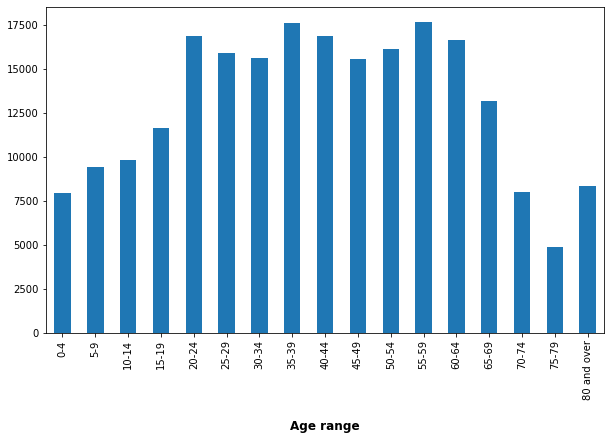

In [37]:
ax = df6["Mueang Chiang Mai"].plot(kind = "bar", figsize=(10, 6))
ax.set_xlabel("Age range", labelpad=20, weight='bold', size=12)
ax.set_xticklabels(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
       '80 and over'])

ax

In [38]:
[cnx_lat, cnx_long] = find_coor("chiang mai")
print('The geograpical coordinate of Chiang Mai City are {}, {}.'.format(cnx_lat, cnx_long))

The geograpical coordinate of Chiang Mai City are 18.7882778, 98.9868056.


# Visualize each district on map

In [39]:
map_cnx = folium.Map(location=[cnx_lat, cnx_long], zoom_start=11)
for lat, lng, dis in zip(df3['Latitude'], df3['Longitude'], df['District']):
    label = '{}'.format(dis)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cnx)  

map_cnx


Define Foursquare Credentials and Version

In [40]:
CLIENT_ID = 'KOP1BQD4WD04PHXHOSJOIID0UXP51GC3OL1OJZX5YSQOX030' # your Foursquare ID
CLIENT_SECRET = 'WO0FY4KQ1MN2X15O3GBC0GKZRCKKOTQW40NAWTYXNXRTVZPD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


Explore the venues of urbant districts
First, let's create a function to repeat the same process to all the districts of Chiang Mai.

In [41]:
  def getNearbyVenues(names, latitudes, longitudes, radius=1500, LIMIT=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [42]:
cnx_venues = getNearbyVenues(names=df3['District'],
                             latitudes=df3['Latitude'],
                             longitudes=df3['Longitude']
                            )

In [43]:
cnx_venues.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mueang Chiang Mai,18.788957,98.987312,Krua Dabb Lob (ครัวดาบลพ),18.788260,98.985535,Thai Restaurant
1,Mueang Chiang Mai,18.788957,98.987312,Chiangmai Walking Street (ถนนคนเดินเชียงใหม่),18.788189,98.988720,Night Market
2,Mueang Chiang Mai,18.788957,98.987312,U Chiang Mai Hotel,18.788485,98.987138,Hotel
3,Mueang Chiang Mai,18.788957,98.987312,ห้องสมุดฟื้นบ้านย่านเวียงเชียงใหม่,18.790276,98.986094,Library
4,Mueang Chiang Mai,18.788957,98.987312,Lamphu House,18.787508,98.989329,Hotel


In [44]:
cnx_group = cnx_venues.groupby('District').count().reset_index()
cnx_group

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chai Prakan,10,10,10,10,10,10
1,Chiang Dao,12,12,12,12,12,12
2,Chom Thong,30,30,30,30,30,30
3,Doi Lo,1,1,1,1,1,1
4,Doi Saket,16,16,16,16,16,16
5,Doi Tao,7,7,7,7,7,7
6,Fang,29,29,29,29,29,29
7,Hang Dong,22,22,22,22,22,22
8,Hot,7,7,7,7,7,7
9,Mae Ai,5,5,5,5,5,5


In [45]:
print('In above table, there are {} uniques categories.'.format(len(cnx_venues['Venue Category'].unique())))

In above table, there are 93 uniques categories.



**Results** 

The list of unique categories
The list of first 50 categories.

In [46]:
cnx_venues['Venue Category'].unique()[:50]

array(['Thai Restaurant', 'Night Market', 'Hotel', 'Library',
       'Noodle House', 'Asian Restaurant',
       'Vegetarian / Vegan Restaurant', 'Food Truck', 'Coffee Shop',
       'Spa', 'Farm', 'Herbs & Spices Store', 'Buddhist Temple', 'Café',
       'Japanese Restaurant', 'History Museum', 'Juice Bar', 'Resort',
       'Dessert Shop', 'Jazz Club', 'Bakery', 'Pizza Place',
       'Italian Restaurant', 'Hostel', 'Bed & Breakfast', 'Burger Joint',
       'Historic Site', 'Health & Beauty Service', 'Museum', 'Bar',
       'Som Tum Restaurant', 'Chinese Restaurant', 'Indian Restaurant',
       'Bagel Shop', 'Massage Studio', 'French Restaurant', 'Motel',
       'Restaurant', 'BBQ Joint', 'Food Stand', 'Street Food Gathering',
       'Beer Bar', 'Convenience Store', 'Fried Chicken Joint',
       'Shopping Mall', 'Flea Market', 'Deli / Bodega',
       'Hotpot Restaurant', 'Buffet', 'Movie Theater'], dtype=object)

**Number of venues in each district**

We plot a chart in order to compare visually the different of number of venues between districts.

Text(0, 0.5, 'Number of venues')

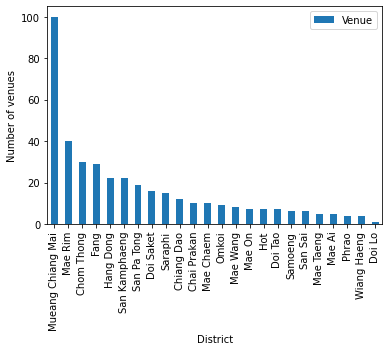

In [47]:
ax = cnx_group.sort_values(by="Venue", ascending=False).plot(x="District", y="Venue", kind="bar")
ax.set_ylabel("Number of venues")

In [48]:
most_venues = cnx_venues.groupby('Venue Category').count().sort_values(by="Venue", ascending=False)
most_venues.head(15)

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Coffee Shop,44,44,44,44,44,44
Thai Restaurant,40,40,40,40,40,40
Noodle House,32,32,32,32,32,32
Café,30,30,30,30,30,30
Convenience Store,24,24,24,24,24,24
Asian Restaurant,20,20,20,20,20,20
Hotel,13,13,13,13,13,13
Flea Market,10,10,10,10,10,10
Restaurant,8,8,8,8,8,8


**The number of categories in each district**

Text(0, 0.5, 'Number of categories')

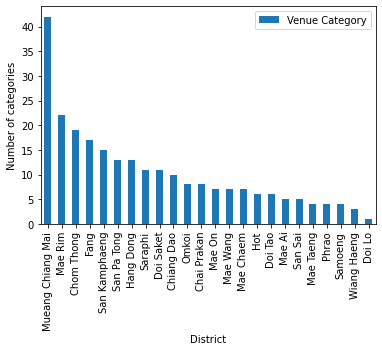

In [78]:
cnx_venues_group_cat = (
    cnx_venues.groupby(['District','Venue Category'])
        .count().reset_index()[['District', 'Venue Category']]
            .groupby('District').count().reset_index()
)
# hcm_venues_group_cat
ax = cnx_venues_group_cat.sort_values(by="Venue Category", ascending=False).plot(x="District", y="Venue Category", kind="bar")
ax.set_ylabel("Number of categories")

In [50]:
#Top 10 venue categories for each district

In [51]:
# one hot encoding
cnx_onehot = pd.get_dummies(cnx_venues[['Venue Category']], prefix="", prefix_sep="")

# add district column back to dataframe
cnx_onehot['District'] = cnx_venues['District'] 

# move district column to the first column
fixed_columns = [cnx_onehot.columns[-1]] + list(cnx_onehot.columns[:-1])
cnx_onehot = cnx_onehot[fixed_columns]

# group the rows by district and by taking the mean of the frequency of occurrence of each category
cnx_grouped = cnx_onehot.groupby('District').mean().reset_index()
cnx_grouped.head()

,District,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Buddhist Temple,Buffet,Burger Joint,Cafeteria,Café,Cave,Chinese Restaurant,City,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cooking School,Deli / Bodega,Department Store,Dessert Shop,Diner,Electronics Store,Event Service,Event Space,Farm,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gourmet Shop,Grocery Store,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Lake,Library,Market,Massage Studio,Miscellaneous Shop,Motel,Movie Theater,Museum,Night Market,Noodle House,Pastry Shop,Pet Store,Pizza Place,Plaza,Pub,Resort,Restaurant,River,Salad Place,Shop & Service,Shopping Mall,Som Tum Restaurant,Spa,Steakhouse,Street Food Gathering,Thai Restaurant,Thrift / Vintage Store,Tourist Information Center,Vegetarian / Vegan Restaurant
0,Chai Prakan,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.100000,0.0,0.100000,0.0,0.0,0.2000,0.000000,0.100000,0.0,0.000000,0.0,0.0,0.2000,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.100000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,0.0
1,Chiang Dao,0.0,0.083333,0.0,0.166667,0.0,0.000000,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.083333,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.083333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.083333,0.0,0.0,0.000000,0.0,0.0,0.166667,0.083333,0.083333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0
2,Chom Thong,0.0,0.000000,0.0,0.033333,0.0,0.033333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.066667,0.0,0.000000,0.0,0.0,0.1000,0.033333,0.066667,0.0,0.033333,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.066667,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.033333,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0000,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.066667,0.0,0.0,0.033333,0.0,0.0,0.000000,0.033333,0.000000,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0
3,Doi Lo,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,Doi Saket,0.0,0.000000,0.0,0.125000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.125000,0.0,0.000000,0.0,0.0,0.0625,0.000000,0.062500,0.0,0.000000,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0625,0.062500,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0625,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.125000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.187500,0.0,0.0,0.0


In [52]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cnx_10 = pd.DataFrame(columns=columns)
cnx_10['District'] = cnx_grouped['District']

for ind in np.arange(cnx_grouped.shape[0]):
    cnx_10.iloc[ind, 1:] = return_most_common_venues(cnx_grouped.iloc[ind, :], num_top_venues)

cnx_10

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chai Prakan,Coffee Shop,Diner,Convenience Store,Thai Restaurant,Chinese Restaurant,Café,Noodle House,Salad Place,Event Service,Cooking School
1,Chiang Dao,Resort,Asian Restaurant,Flea Market,Chinese Restaurant,Restaurant,River,Bakery,Thai Restaurant,Art Gallery,Noodle House
2,Chom Thong,Thai Restaurant,Coffee Shop,Noodle House,Convenience Store,Café,Flea Market,Pizza Place,Construction & Landscaping,Deli / Bodega,Hotpot Restaurant
3,Doi Lo,Forest,Vegetarian / Vegan Restaurant,Farm,Convenience Store,Cooking School,Deli / Bodega,Department Store,Dessert Shop,Diner,Electronics Store
4,Doi Saket,Thai Restaurant,Asian Restaurant,Café,Noodle House,Coffee Shop,Gourmet Shop,Flea Market,Fast Food Restaurant,Convenience Store,Diner
5,Doi Tao,Convenience Store,Coffee Shop,Thai Restaurant,Lake,BBQ Joint,Café,Event Space,Cooking School,Deli / Bodega,Department Store
6,Fang,Café,Noodle House,Asian Restaurant,Coffee Shop,Fried Chicken Joint,Thai Restaurant,Bar,Farmers Market,Department Store,Market
7,Hang Dong,Coffee Shop,Noodle House,Thai Restaurant,Asian Restaurant,Market,Antique Shop,Grocery Store,Hotel,Convenience Store,Café
8,Hot,Convenience Store,Gas Station,BBQ Joint,Noodle House,Farmers Market,Thai Restaurant,Food Stand,Food Court,Forest,Cooking School
9,Mae Ai,Deli / Bodega,Café,BBQ Joint,Noodle House,Plaza,Vegetarian / Vegan Restaurant,Event Space,Cooking School,Department Store,Dessert Shop


In [53]:
#Consider the data relating to category "Coffee Shop" only

In [54]:
cnx_grouped_cfs = cnx_grouped[["District", "Coffee Shop"]]
cnx_grouped_cfs

,District,Coffee Shop
0,Chai Prakan,0.200000
1,Chiang Dao,0.000000
2,Chom Thong,0.100000
3,Doi Lo,0.000000
4,Doi Saket,0.062500
5,Doi Tao,0.142857
6,Fang,0.103448
7,Hang Dong,0.227273
8,Hot,0.000000
9,Mae Ai,0.000000


In [55]:
#We want to cluster districts by the category "Café" only. We will use the K-Means clustering to do this but first we need to determine how many k we need to use. The "elbow" method helps to find a good k.

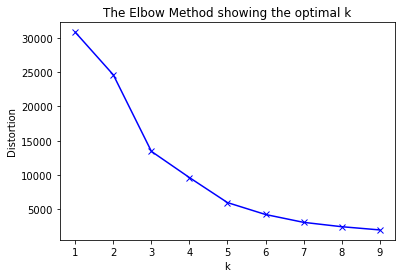

In [56]:
# try with 10 different values of k to find the best one
Ks = 10
distortions = []

cnx_cfs_clustering = cnx_grouped_cfs.drop('District', 1)
cnx_cfs_clustering["pop 2019"] = dfmain["pop 2019"]
cnx_cfs_clustering["Population density"] = dfmain["Population density"]
cnx_cfs_clustering["Area (Sq.km.)"] = dfmain["Area (Sq.km.)"]

for k in range(1, Ks):

    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(cnx_cfs_clustering)

    # find the distortion w.r.t each k
    distortions.append(
        sum(np.min(cdist(cnx_cfs_clustering, kmeans.cluster_centers_, 'euclidean'), axis=1))
        / cnx_cfs_clustering.shape[0]
    )

plt.plot(range(1, Ks), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We see that, the "elbow" appears at k=3.

In [57]:
nclusters = 3
kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(cnx_cfs_clustering)

In [58]:
#Let's create a new dataframe look like hcm_grouped_cafe but contains the cluster labels for each district.

In [59]:
df_cfs = cnx_grouped_cfs.copy()
df_cfs["Coffee Cluster Labels"] = kmeans.labels_

# add two columns Latitude and Logitude into cafe_merged
df_cfs = df_cfs.join(df.set_index("District"), on="District")

# sort the table by cluster labels
df_cfs.sort_values(["Coffee Cluster Labels"], inplace=True)

df_cfs

,District,Coffee Shop,Coffee Cluster Labels,pop 2019,Area (Sq.km.),Population density,rice planted area (rai),loan for agri,TotalAnimal2leg,TotalAnimal4leg,Latitude,Longitude
23,Wiang Haeng,0.000000,0,52030.0,672.17,65.91,0.0,174.65,159319.0,967.0,19.558022,98.640487
1,Chiang Dao,0.000000,0,96494.0,1882.08,48.59,120.0,585.86,124016.0,34512.0,19.368442,98.964982
2,Chom Thong,0.100000,0,66729.0,712.30,93.69,2045.0,1439.68,88037.0,531.0,18.422113,98.677280
21,San Sai,0.166667,0,135964.0,285.02,368.18,15040.0,1150.30,653173.0,6547.0,19.892948,99.199322
20,San Pa Tong,0.052632,0,75097.0,178.19,422.75,6979.0,1162.87,442096.0,2147.0,18.624430,98.895356
19,San Kamphaeng,0.045455,0,87640.0,197.83,419.08,4685.0,1469.59,915125.0,6760.0,18.745091,99.119529
17,Phrao,0.000000,0,48514.0,1148.19,43.08,15172.0,1382.39,676091.0,16209.0,19.368634,99.204262
7,Hang Dong,0.227273,0,90128.0,277.14,398.66,10290.0,802.15,1555069.0,6059.0,18.685687,98.919222
16,Omkoi,0.111111,0,63610.0,2093.83,29.56,0.0,186.17,104165.0,14196.0,17.799298,98.357351
15,Mueang Chiang Mai,0.120000,0,233632.0,152.36,1546.27,1686.0,806.83,0.0,0.0,18.788957,98.987312


In [60]:
df_cfs.drop(columns=["rice planted area (rai)","loan for agri","TotalAnimal2leg","TotalAnimal4leg"],inplace = True)
df_cfs

,District,Coffee Shop,Coffee Cluster Labels,pop 2019,Area (Sq.km.),Population density,Latitude,Longitude
23,Wiang Haeng,0.000000,0,52030.0,672.17,65.91,19.558022,98.640487
1,Chiang Dao,0.000000,0,96494.0,1882.08,48.59,19.368442,98.964982
2,Chom Thong,0.100000,0,66729.0,712.30,93.69,18.422113,98.677280
21,San Sai,0.166667,0,135964.0,285.02,368.18,19.892948,99.199322
20,San Pa Tong,0.052632,0,75097.0,178.19,422.75,18.624430,98.895356
19,San Kamphaeng,0.045455,0,87640.0,197.83,419.08,18.745091,99.119529
17,Phrao,0.000000,0,48514.0,1148.19,43.08,19.368634,99.204262
7,Hang Dong,0.227273,0,90128.0,277.14,398.66,18.685687,98.919222
16,Omkoi,0.111111,0,63610.0,2093.83,29.56,17.799298,98.357351
15,Mueang Chiang Mai,0.120000,0,233632.0,152.36,1546.27,18.788957,98.987312


In [61]:
df_cfs_mean=df_cfs.groupby('Coffee Cluster Labels').mean()
df_cfs_mean

,Coffee Shop,pop 2019,Area (Sq.km.),Population density,Latitude,Longitude
Coffee Cluster Labels,,,,,,
0,0.096372,91298.500000,865.261667,357.541667,18.870063,98.864185
1,0.200000,49239.000000,510.850000,89.960000,19.731711,99.140821
2,0.112164,56529.363636,776.225455,81.458182,18.957488,98.958489


In [62]:

# create map
map_clusters = folium.Map(location=[cnx_lat, cnx_long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(nclusters)
ys = [i+x+(i*x)**2 for i in range(nclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        df_cfs['Latitude'], 
        df_cfs['Longitude'], 
        df_cfs['District'], 
        df_cfs['Coffee Cluster Labels']
):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Coffee Summary

cluster 0 = high Population density, high pop 2019, high Area ,  low caffee shop revernue

cluster 1 = low density, low pop 2019, low Area ,  high caffee shop revernue

cluster 2 = medium density, medium pop 2019, medium Area ,  medium caffee shop revernue

cluster 0

In [63]:
df_cfs[df_cfs["Coffee Cluster Labels"] == 0]

,District,Coffee Shop,Coffee Cluster Labels,pop 2019,Area (Sq.km.),Population density,Latitude,Longitude
23,Wiang Haeng,0.000000,0,52030.0,672.17,65.91,19.558022,98.640487
1,Chiang Dao,0.000000,0,96494.0,1882.08,48.59,19.368442,98.964982
2,Chom Thong,0.100000,0,66729.0,712.30,93.69,18.422113,98.677280
21,San Sai,0.166667,0,135964.0,285.02,368.18,19.892948,99.199322
20,San Pa Tong,0.052632,0,75097.0,178.19,422.75,18.624430,98.895356
19,San Kamphaeng,0.045455,0,87640.0,197.83,419.08,18.745091,99.119529
17,Phrao,0.000000,0,48514.0,1148.19,43.08,19.368634,99.204262
7,Hang Dong,0.227273,0,90128.0,277.14,398.66,18.685687,98.919222
16,Omkoi,0.111111,0,63610.0,2093.83,29.56,17.799298,98.357351
15,Mueang Chiang Mai,0.120000,0,233632.0,152.36,1546.27,18.788957,98.987312


cluster 1

In [64]:
df_cfs[df_cfs["Coffee Cluster Labels"] == 1]

,District,Coffee Shop,Coffee Cluster Labels,pop 2019,Area (Sq.km.),Population density,Latitude,Longitude
0,Chai Prakan,0.2,1,49239.0,510.85,89.96,19.731711,99.140821


cluster 2

In [65]:
df_cfs[df_cfs["Coffee Cluster Labels"] == 2]

,District,Coffee Shop,Coffee Cluster Labels,pop 2019,Area (Sq.km.),Population density,Latitude,Longitude
13,Mae Taeng,0.200000,2,80303.0,1362.78,55.69,19.121308,98.943384
14,Mae Wang,0.125000,2,31883.0,601.22,52.72,18.599203,98.819252
9,Mae Ai,0.000000,2,78565.0,736.70,105.24,20.032867,99.298000
8,Hot,0.000000,2,43756.0,1430.38,30.63,18.193488,98.611673
6,Fang,0.103448,2,120759.0,888.16,132.40,19.920420,99.215546
18,Samoeng,0.500000,2,23780.0,898.02,26.26,18.847780,98.732032
5,Doi Tao,0.142857,2,27395.0,803.92,34.16,17.952862,98.684031
4,Doi Saket,0.062500,2,74172.0,671.28,106.24,18.873195,99.136566
3,Doi Lo,0.000000,2,25689.0,260.13,100.11,19.278280,98.912594
12,Mae Rim,0.100000,2,94337.0,443.63,204.46,18.914458,98.945274


**conclusion**  
if you a investor, I will tell you to invest in cluster 0 area because have a high population and Population density and have a lot of area.
the important low caffee shop revernue. I think it have a chance to grow the business.

# Cluster for agri and animal

In [66]:
from sklearn.preprocessing import StandardScaler
X = df3.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 3.58848302e+00, -1.02127186e+00,  4.02964962e+00,
        -4.84175820e-01, -4.82647601e-02, -8.82802959e-01,
        -9.54159896e-01, -2.79242434e-01,  3.31705670e-01],
       [-9.80970501e-02, -1.44094890e-01, -3.56552471e-01,
        -4.24496665e-01,  1.39845730e+00, -6.26468879e-01,
        -8.98380361e-01, -9.14758720e-01, -7.62172022e-01],
       [-2.42774494e-01,  2.94870824e+00, -5.72966785e-01,
        -7.24056100e-01,  1.72864140e-01,  4.89554214e-02,
         2.76019410e-02, -7.81144153e-01, -1.87195624e+00],
       [ 5.59357015e-01,  1.68843017e+00, -4.92736168e-01,
        -7.44503276e-01, -5.53411592e-01, -5.21710154e-01,
         2.67119475e+00,  7.24649009e-01,  2.52919599e-01],
       [ 6.63051205e-02, -2.08354988e-01, -3.18656564e-01,
        -4.43946418e-01, -2.57163332e-01, -2.06991407e-01,
        -2.75666455e-01, -1.33310606e-01,  8.58315113e-01],
       [ 2.01727626e-01,  8.74918002e-01, -4.71297049e-01,
         5.16405889e-01,  3.21891257e-01,  4.905440

In [67]:
agri_cluster = Clus_dataSet

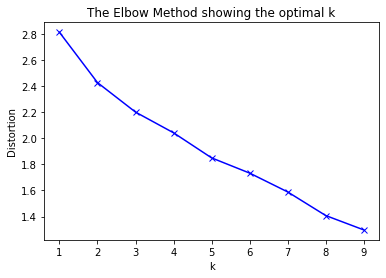

In [68]:
# try with 10 different values of k to find the best one
Ks = 10
distortions = []

agri_clustering = Clus_dataSet

for k in range(1, Ks):

    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(agri_clustering)

    # find the distortion w.r.t each k
    distortions.append(
        sum(np.min(cdist(agri_clustering, kmeans.cluster_centers_, 'euclidean'), axis=1))
        / Clus_dataSet.shape[0]
    )

plt.plot(range(1, Ks), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [69]:
#We see that, the "elbow" appears at k=4.

Modeling

In [70]:
nclusters = 4
kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(Clus_dataSet)
kmeans.fit(X)
labels = kmeans.labels_
print(labels)

[0 0 3 0 0 3 3 0 0 0 2 3 2 2 1 3 0 0 0 0 0 0 0 0 0]


In [71]:
df_farm = df3.copy()
df_farm["Cluster Labels"] = kmeans.labels_

# sort the table by cluster labels
df_farm.sort_values(["Cluster Labels"], inplace=True)

df_farm

,District,pop 2019,Area (Sq.km.),Population density,rice planted area (rai),loan for agri,TotalAnimal2leg,TotalAnimal4leg,Latitude,Longitude,Cluster Labels
0,Mueang Chiang Mai,233632.0,152.36,1546.27,1686.0,806.83,0.0,0.0,18.788957,98.987312,0
22,Mae On,21184.0,442.26,48.13,181.0,486.45,235892.0,5658.0,18.798510,99.245030,0
21,Mae Wang,31883.0,601.22,52.72,1092.0,628.10,41092.0,11703.0,18.599203,98.819252,0
20,Chai Prakan,49239.0,510.85,89.96,780.0,1255.52,14062.0,4635.0,19.731711,99.140821,0
19,Wiang Haeng,52030.0,672.17,65.91,0.0,174.65,159319.0,967.0,19.558022,98.640487,0
18,Saraphi,85565.0,97.46,832.71,2164.0,1199.98,119959.0,36017.0,18.687898,99.042373,0
17,Omkoi,63610.0,2093.83,29.56,0.0,186.17,104165.0,14196.0,17.799298,98.357351,0
16,Doi Tao,27395.0,803.92,34.16,812.0,543.15,18224.0,23248.0,17.952862,98.684031,0
23,Doi Lo,25689.0,260.13,100.11,1927.0,1026.64,77198.0,16443.0,19.278280,98.912594,0
24,Galyani Vadhana,12610.0,674.58,17.74,0.0,56.05,155152.0,3558.0,19.048827,98.278031,0


In [72]:
df_farm_mean=df_farm.groupby('Cluster Labels').mean()
df_farm_mean

,pop 2019,Area (Sq.km.),Population density,rice planted area (rai),loan for agri,TotalAnimal2leg,TotalAnimal4leg,Latitude,Longitude
Cluster Labels,,,,,,,,,
0,66458.5,756.0825,208.105625,2668.562500,730.202500,1.111975e+05,10519.000000,18.981774,98.883230
1,90128.0,277.1400,398.660000,10290.000000,802.150000,1.555069e+06,6059.000000,18.685687,98.919222
2,90706.0,543.6800,276.780000,11632.333333,1334.093333,7.481297e+05,9838.666667,19.335557,99.174371
3,70734.4,1220.3100,147.110000,5416.000000,842.180000,4.002536e+05,4640.400000,18.670585,98.751685


In [73]:

# create map
map_clusters = folium.Map(location=[cnx_lat, cnx_long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(nclusters)
ys = [i+x+(i*x)**2 for i in range(nclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        df_farm['Latitude'], 
        df_farm['Longitude'], 
        df_farm['District'], 
        df_farm['Cluster Labels']
):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Summarise data about agri

cluster 0 = low pop, medium area, medium density, low rice planted, low loan for agri, low 2 leg animal, high 4 leg animal

cluster 1 = high pop, low area, high density, high rice planted, medium loan for agri, low 2 leg animal, medium 4 leg animal

cluster 2 =  high pop, medium area, medium density, high rice planted, high loan for agri, high 2 leg animal, high 4 leg animal

cluster 3 =  medium pop, high area, low density, low rice planted, medium loan for agri, medium 2 leg animal, low 4 leg animal

# Conclusion Area for activity

cluster 0 = high 4 leg animal

In [74]:
df_farm[df_farm['Cluster Labels'] == 0]

,District,pop 2019,Area (Sq.km.),Population density,rice planted area (rai),loan for agri,TotalAnimal2leg,TotalAnimal4leg,Latitude,Longitude,Cluster Labels
0,Mueang Chiang Mai,233632.0,152.36,1546.27,1686.0,806.83,0.0,0.0,18.788957,98.987312,0
22,Mae On,21184.0,442.26,48.13,181.0,486.45,235892.0,5658.0,18.798510,99.245030,0
21,Mae Wang,31883.0,601.22,52.72,1092.0,628.10,41092.0,11703.0,18.599203,98.819252,0
20,Chai Prakan,49239.0,510.85,89.96,780.0,1255.52,14062.0,4635.0,19.731711,99.140821,0
19,Wiang Haeng,52030.0,672.17,65.91,0.0,174.65,159319.0,967.0,19.558022,98.640487,0
18,Saraphi,85565.0,97.46,832.71,2164.0,1199.98,119959.0,36017.0,18.687898,99.042373,0
17,Omkoi,63610.0,2093.83,29.56,0.0,186.17,104165.0,14196.0,17.799298,98.357351,0
16,Doi Tao,27395.0,803.92,34.16,812.0,543.15,18224.0,23248.0,17.952862,98.684031,0
23,Doi Lo,25689.0,260.13,100.11,1927.0,1026.64,77198.0,16443.0,19.278280,98.912594,0
24,Galyani Vadhana,12610.0,674.58,17.74,0.0,56.05,155152.0,3558.0,19.048827,98.278031,0


cluster 1 = high pop, low area, high density, high rice planted, medium loan for agri, low 2 leg animal, medium 4 leg animal

In [75]:
df_farm[df_farm['Cluster Labels'] == 1]

,District,pop 2019,Area (Sq.km.),Population density,rice planted area (rai),loan for agri,TotalAnimal2leg,TotalAnimal4leg,Latitude,Longitude,Cluster Labels
14,Hang Dong,90128.0,277.14,398.66,10290.0,802.15,1555069.0,6059.0,18.685687,98.919222,1


cluster 2 =  high pop, medium area, medium density, high rice planted, high loan for agri, high 2 leg animal, high 4 leg animal

In [76]:
df_farm[df_farm['Cluster Labels'] == 2]

,District,pop 2019,Area (Sq.km.),Population density,rice planted area (rai),loan for agri,TotalAnimal2leg,TotalAnimal4leg,Latitude,Longitude,Cluster Labels
10,Phrao,48514.0,1148.19,43.08,15172.0,1382.39,676091.0,16209.0,19.368634,99.204262,2
13,San Sai,135964.0,285.02,368.18,15040.0,1150.30,653173.0,6547.0,19.892948,99.199322,2
12,San Kamphaeng,87640.0,197.83,419.08,4685.0,1469.59,915125.0,6760.0,18.745091,99.119529,2


cluster 3 =  high area, low density, low rice planted, medium loan for agri, medium 2 leg animal, low 4 leg animal

In [77]:
df_farm[df_farm['Cluster Labels'] == 3]

,District,pop 2019,Area (Sq.km.),Population density,rice planted area (rai),loan for agri,TotalAnimal2leg,TotalAnimal4leg,Latitude,Longitude,Cluster Labels
11,San Pa Tong,75097.0,178.19,422.75,6979.0,1162.87,442096.0,2147.0,18.624430,98.895356,3
15,Hot,43756.0,1430.38,30.63,1731.0,488.95,431960.0,1392.0,18.193488,98.611673,3
6,Mae Rim,94337.0,443.63,204.46,10422.0,686.77,335532.0,5963.0,18.914458,98.945274,3
5,Mae Taeng,80303.0,1362.78,55.69,7705.0,968.75,471671.0,4354.0,19.121308,98.943384,3
2,Mae Chaem,60179.0,2686.57,22.02,243.0,903.56,320009.0,9346.0,18.499240,98.362740,3


**From all above results**

we conclude that, you shold avoid area cluster 3 because even have high area but  low density, low rice planted, medium loan for agri, medium 2 leg animal, low 4 leg animal